from: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

In [12]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

### The idea of Dropout
Training one deep neural network with large parameters on the data might lead to overfitting.<br>
Dropout deactivates the neurons randomly at each training step instead of training the data on the original network, we train the data on the network with dropped out nodes.<br>
In the next iteration of the training step, the hidden neurons which are deactivated by dropout changes because of its probabilistic behavior. <br>In this way, by applying dropout i.e…deactivating certain individual nodes at random during training we can simulate an ensemble of neural network with different architectures.

<img src="./dropout.png">

In [2]:
N = 50 #number of data points
noise = 0.3

# generate the train data
X_train = torch.unsqueeze(torch.linspace(-1, 1, N),1)
Y_train = X_train + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1))

# generate the test data
X_test = torch.unsqueeze(torch.linspace(-1,1,N),1)
Y_test = X_test + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1))

In [28]:
print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)

print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: torch.Size([50, 1])
Y_train.shape: torch.Size([50, 1])
X_test.shape: torch.Size([50, 1])
Y_test.shape: torch.Size([50, 1])


Text(0, 0.5, 'Y')

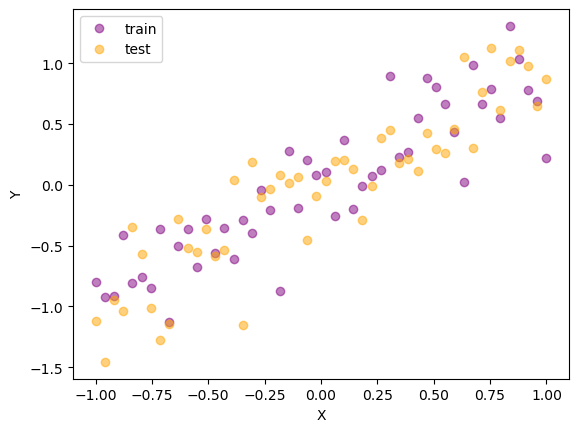

In [17]:
plt.plot(X_train, Y_train, 'o', c='purple', alpha=0.5, label='train')  # plot the new X,Y 
plt.plot(X_test, Y_test, 'o', label='test', c='orange', alpha=0.5,)  # plot the new X,Y 
plt.legend(loc="upper left")
plt.xlabel('X')
plt.ylabel('Y')

To show the overfitting, we will train two networks — one without dropout and another with dropout.<br>The network without dropout has 3 fully connected hidden layers with `ReLU` as the activation function for the hidden layers and the network with dropout also has similar architecture but with dropout applied after first & second Linear layer.

In [14]:
# create a neural network without dropout
N_h = 100 #hidden nodes

model = torch.nn.Sequential(
  nn.Linear(1, N_h),
  nn.ReLU(),
  nn.Linear(N_h, N_h),
  nn.ReLU(),
  nn.Linear(N_h, 1)
)

# create a network with dropout
model_dropout = nn.Sequential(
  nn.Linear(1, N_h),
  nn.Dropout(0.5), # 50 % probability 
  nn.ReLU(),
  torch.nn.Linear(N_h, N_h),
  torch.nn.Dropout(0.2), # 20% probability
  torch.nn.ReLU(),
  torch.nn.Linear(N_h, 1),
)

In [ ]:
import torch.nn as nn
nn.Dropout(0.5) # apply dropout in a neural network

In [18]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

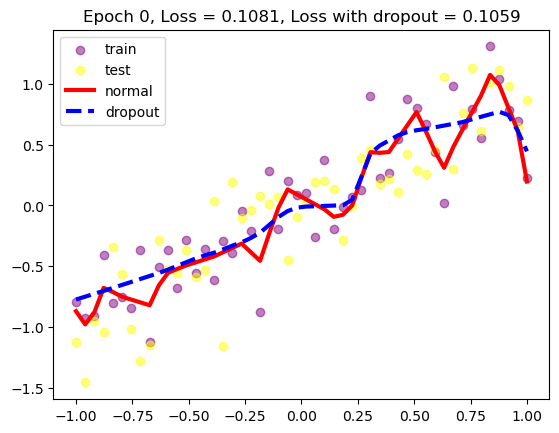

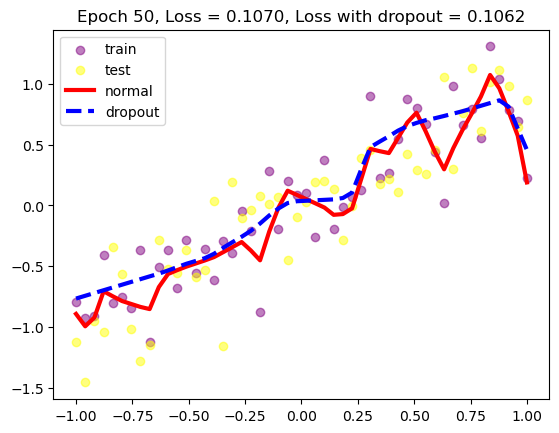

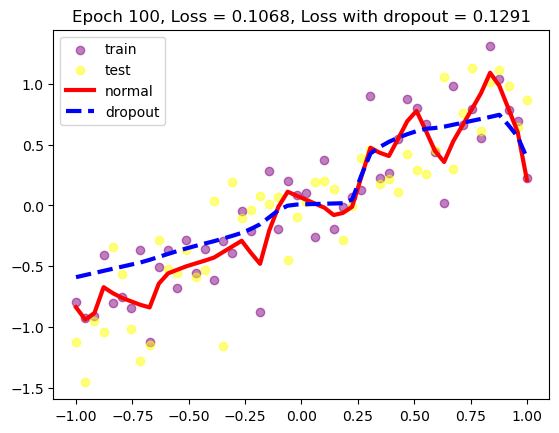

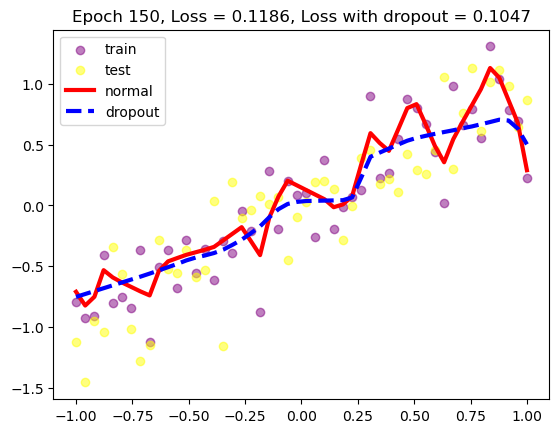

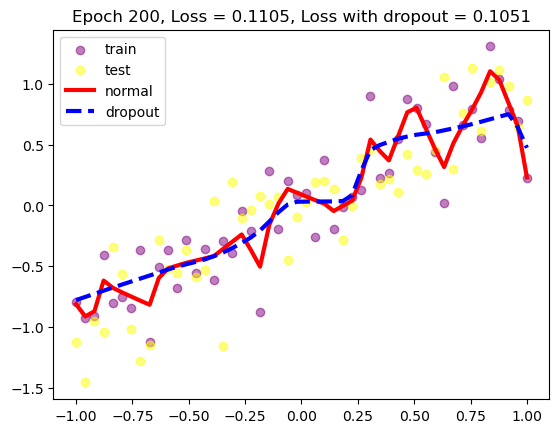

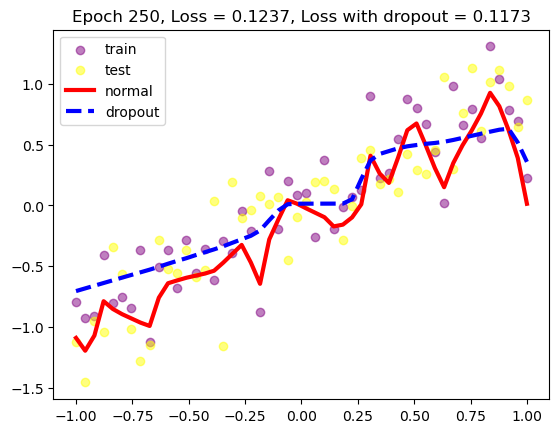

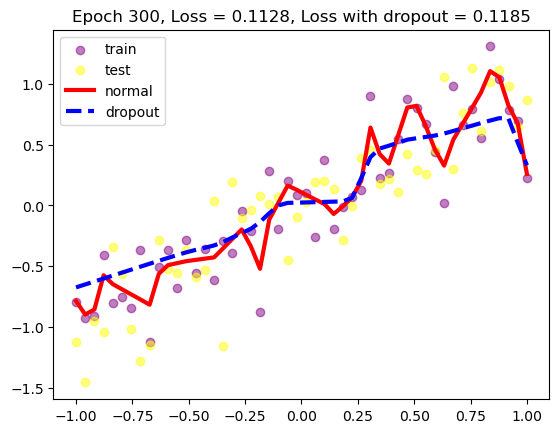

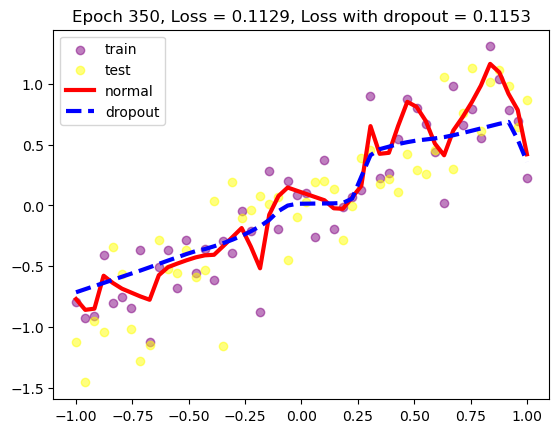

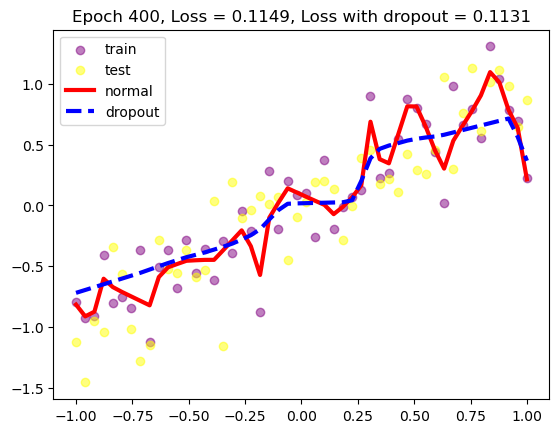

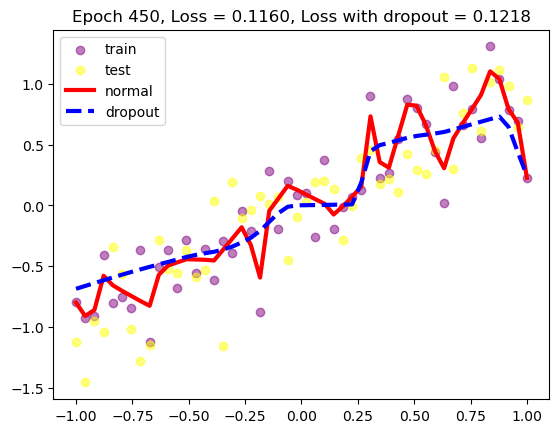

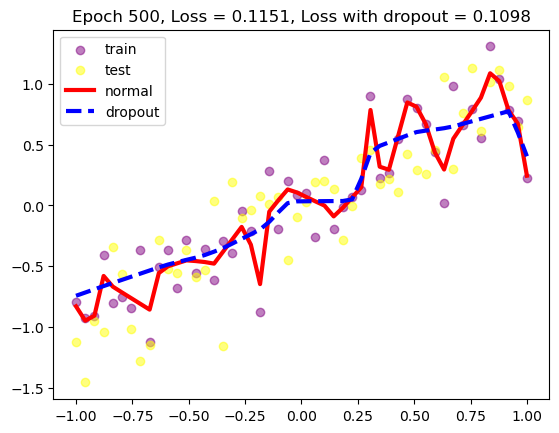

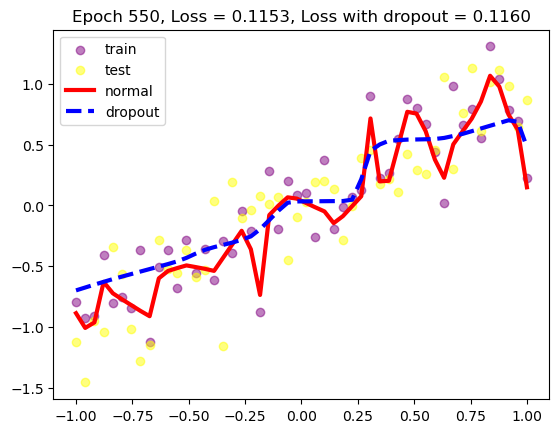

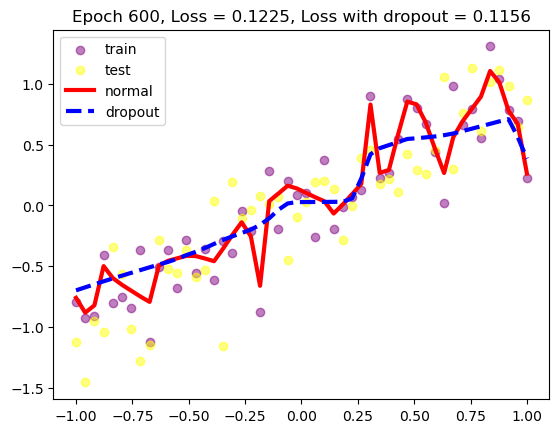

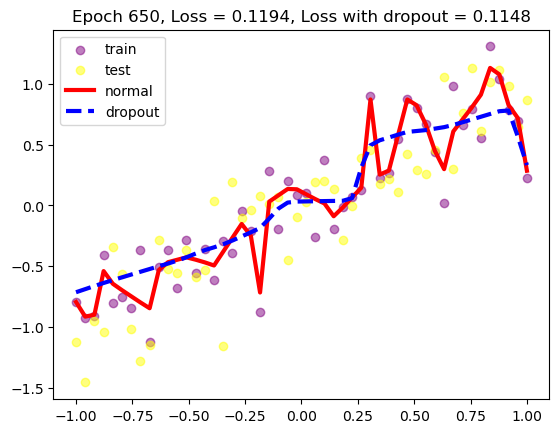

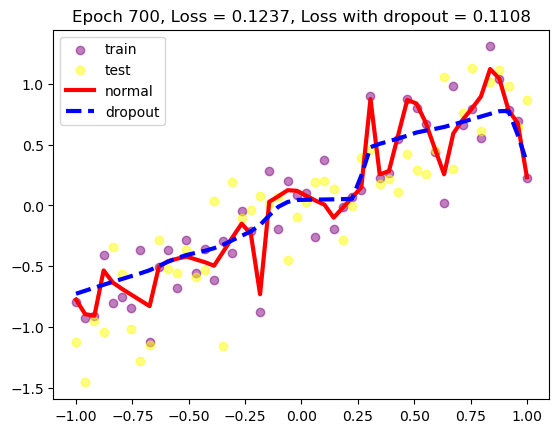

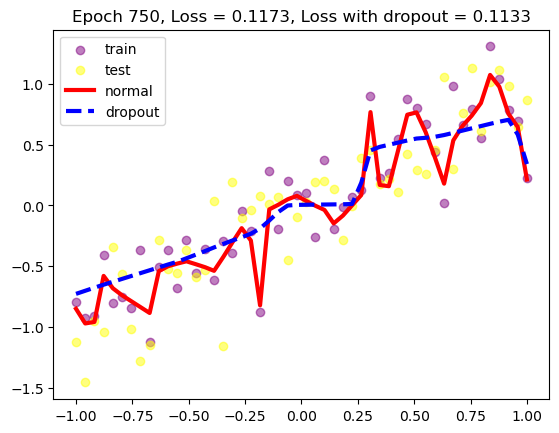

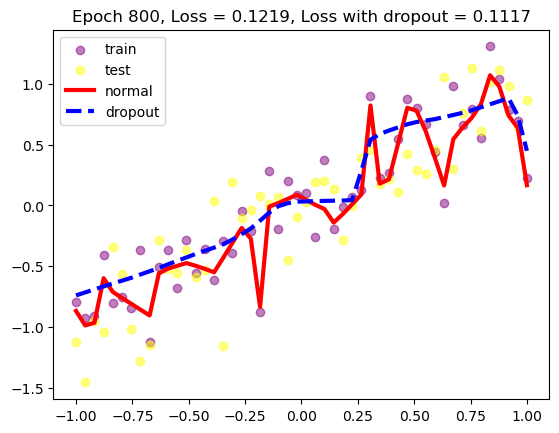

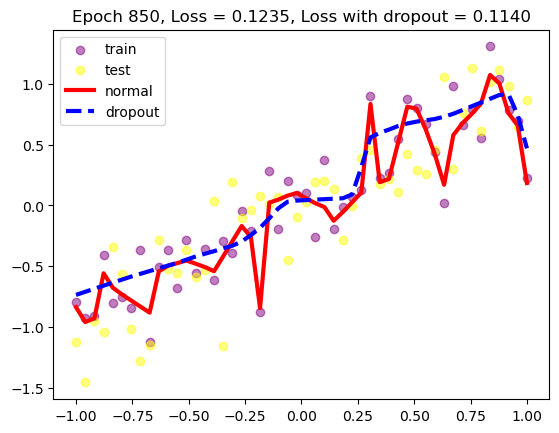

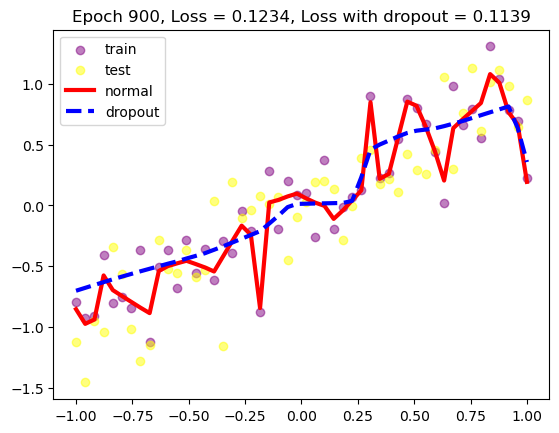

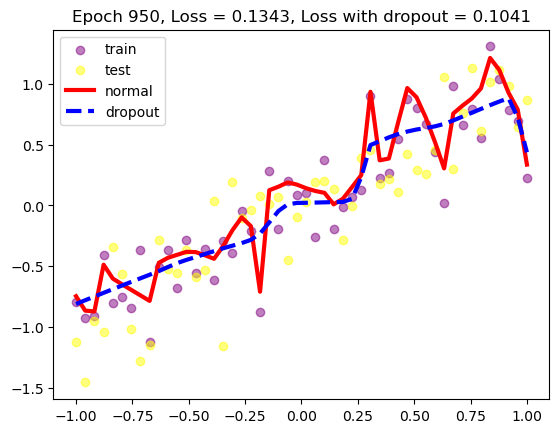

In [38]:
max_epochs = 1000

for epoch in range(max_epochs):
    
  pred = model(X_train) # look at the entire data in a single shot
  loss = loss_fn(pred, Y_train)
  opt.zero_grad()
  loss.backward()
  opt.step()
  
  pred_dropout = model_dropout(X_train)
  loss_dropout = loss_fn(pred_dropout, Y_train)
  opt_dropout.zero_grad()
  loss_dropout.backward()
  opt_dropout.step()
  
  if epoch % 50 == 0:
      
      model.eval()
      model_dropout.eval()
      
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, Y_test)
      
      test_pred_dropout = model_dropout(X_test)      
      test_loss_dropout = loss_fn(test_pred_dropout, Y_test)
            
      plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
      plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
      plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
      plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3,  label='dropout')
      
      plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
      
      plt.legend()

      model.train()
      model_dropout.train()
      
      plt.pause(0.05)